In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

In [2]:
# Optuna trial

import optuna

function_name = "Eggholder"

function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))


def objective(trial):
    ranges = ex_func.function_ranges[function_name]
    
    params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
    
    return function_param(params)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print('Best parameters:', study.best_params)
print('Best value:', study.best_value)


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-05-12 18:32:43,114] A new study created in memory with name: no-name-f9a7edb7-6955-4b22-92b3-6895926967ca
C:\Users\user\AppData\Local\Temp\ipykernel_2236\2677191833.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
[I 2024-05-12 18:32:43,117] Trial 0 finished with value: -123.09096430705446 and parameters: {'x0': -46.087536319196715, 'x1': 42.038921577242604}. Best is trial 0 with value: -123.09096430705446.
[I 2024-05-12 18:32:43,119] Trial 1 finish

Best parameters: {'x0': 428.0130603222249, 'x1': 445.91626521547767}
Best value: -908.9182074431606


Working on function: Bukin


C:\Users\user\AppData\Local\Temp\ipykernel_2236\2107913425.py:37: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]


******
******
******
******
0.9781901563843391
Working on function: Eggholder
******
******
******
******
0.8991105914744495


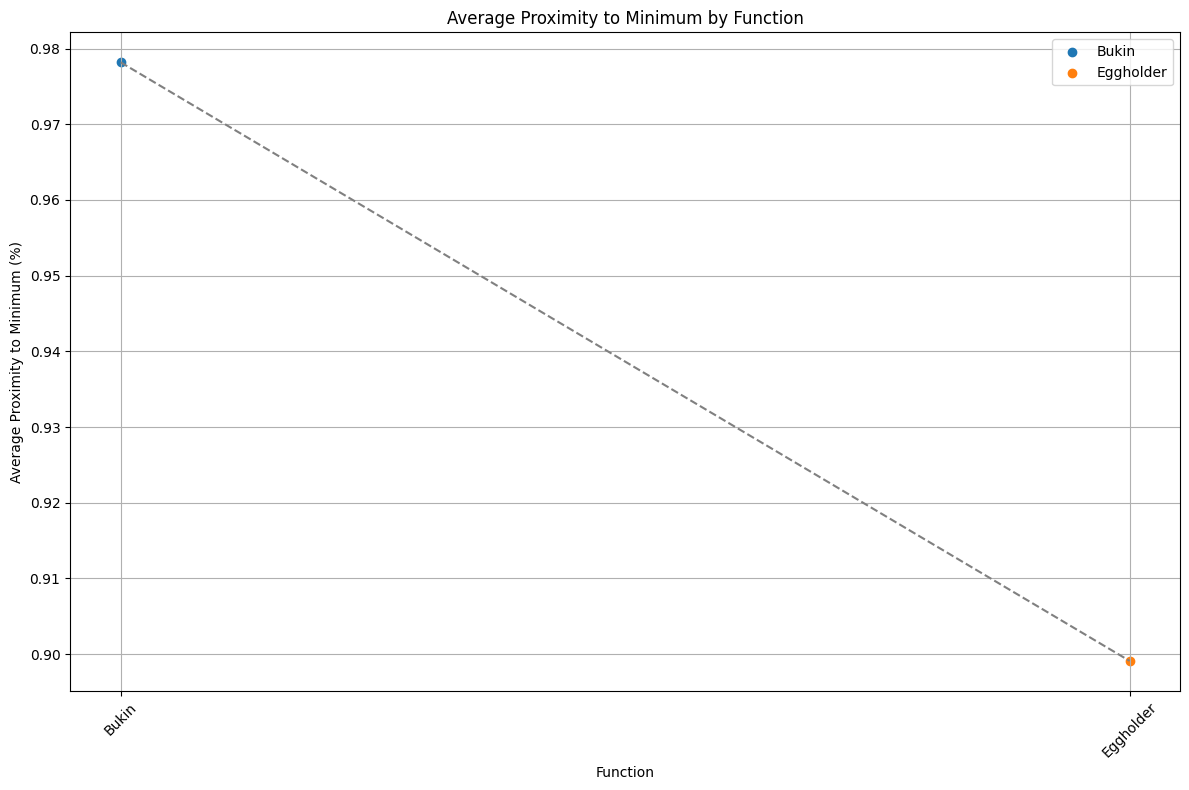

In [8]:
import optuna
import matplotlib.pyplot as plt
import pandas as pd


# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

for function_name in function_names:
    if function_name == 'Eggholder' or function_name == 'Bukin':
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    def objective(trial):
                        ranges = ex_func.function_ranges[function_name]
                        
                        params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
                        
                        return function_param(params)
                    
                    optuna.logging.set_verbosity(optuna.logging.WARNING)
                    study = optuna.create_study(direction='minimize')
                    study.optimize(objective, n_trials=100)

                    #print('Best parameters:', study.best_params)
                    #print('Best value:', study.best_value)
                    
                    iteration_count += 100
                    minimum_value_so_far = study.best_value
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")           
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

                print("******")
                print("******")
                print("******")
                print("******")
                
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)
            

# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Plotting
plt.figure(figsize=(12, 8))
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):
    plt.scatter(i, proximity, label=function)

# Connect points with lines
for i in range(len(average_proximities_df["Function"]) - 1):
    plt.plot([i, i + 1], [average_proximities_df["Average Proximity to Minimum (%)"][i], average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
